# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Nicolai Andrea
    
ID: 1233407

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1233407
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [42 56 46 58 47 54 49 49 46 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


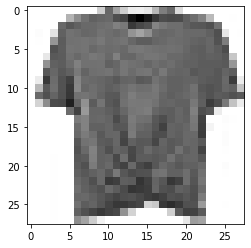

LABEL: 0
INPUT:


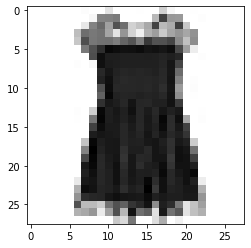

LABEL: 3
INPUT:


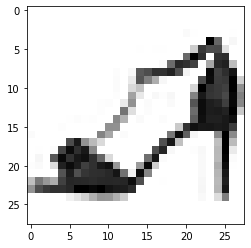

LABEL: 5
INPUT:


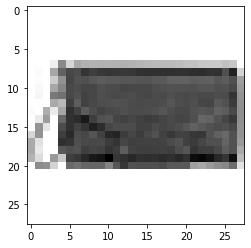

LABEL: 8
INPUT:


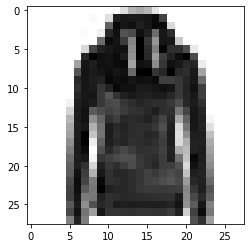

LABEL: 2
INPUT:


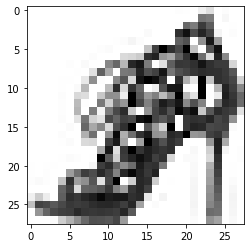

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_train,y_train,4)
plot_input(X_train,y_train,20)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

lin_classif = GridSearchCV(estimator =  SVC(kernel = 'linear'), cv = 4, param_grid= parameters )
lin_classif.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", lin_classif.best_params_ )

print("Score with best parameters:", lin_classif.best_score_ )

print("All scores on the grid:")
scores = pd.DataFrame(lin_classif.cv_results_)[['rank_test_score','param_C','mean_test_score','std_test_score', 'mean_fit_time','std_fit_time','mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.5}
Score with best parameters: 0.798
All scores on the grid:


/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,rank_test_score,param_C,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
3,1,0.5,0.798,0.023352,0.071417,0.002088,0.024174,0.000517
4,1,5,0.798,0.023352,0.069405,0.002648,0.024142,0.000326
5,1,50,0.798,0.023352,0.070700,0.001447,0.024279,0.000299
6,1,500,0.798,0.023352,0.070062,0.002193,0.024224,0.000415
2,5,0.05,0.774,0.018890,0.068661,0.001625,0.024405,0.000331
1,6,0.005,0.694,0.033006,0.094470,0.004000,0.030274,0.001825
0,7,0.0005,0.308,0.026046,0.174073,0.006029,0.032489,0.000355


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

poly2_classif = GridSearchCV(estimator =  SVC(kernel = 'poly', degree = 2), cv = 4, param_grid= parameters )
poly2_classif.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE = 2 KERNEL')

print("Best parameters set found:", poly2_classif.best_params_ )

print("Score with best parameters:", poly2_classif.best_score_ )

print("\nAll scores on the grid:")
scores = pd.DataFrame(poly2_classif.cv_results_)[['rank_test_score','param_C','param_gamma','mean_test_score','std_test_score', 'mean_fit_time','std_fit_time','mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR POLY DEGREE = 2 KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.766

All scores on the grid:


/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,rank_test_score,param_C,param_gamma,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
1,1,0.05,0.5,0.766,0.025865,0.062986,0.001680,0.021984,0.000742
2,1,0.05,5,0.766,0.025865,0.061807,0.001890,0.021368,0.000129
4,1,0.5,0.5,0.766,0.025865,0.064440,0.000947,0.023147,0.002586
5,1,0.5,5,0.766,0.025865,0.066672,0.004296,0.023500,0.002164
6,1,5,0.05,0.766,0.025865,0.069441,0.006442,0.025433,0.003309
7,1,5,0.5,0.766,0.025865,0.068414,0.002795,0.025114,0.001009
8,1,5,5,0.766,0.025865,0.063040,0.001915,0.021455,0.000272
3,8,0.5,0.05,0.762,0.020875,0.068466,0.007793,0.023330,0.002743
0,9,0.05,0.05,0.710,0.013784,0.078488,0.002695,0.025803,0.002912


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 3
poly_classif = GridSearchCV(estimator =  SVC(kernel = 'poly', degree = degree), cv = 4, param_grid= parameters )
poly_classif.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:", poly_classif.best_params_ )

print("Score with best parameters:", poly_classif.best_score_ )

print("\nAll scores on the grid:")
scores = pd.DataFrame(poly_classif.cv_results_)[['rank_test_score','param_C','param_gamma','mean_test_score','std_test_score', 'mean_fit_time','std_fit_time','mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.05}
Score with best parameters: 0.74

All scores on the grid:


,rank_test_score,param_C,param_gamma,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
6,1,5,0.05,0.740,0.022540,0.064187,0.003294,0.021876,0.000920
1,2,0.05,0.5,0.738,0.020154,0.064397,0.000565,0.020727,0.000221
2,2,0.05,5,0.738,0.020154,0.064771,0.003307,0.023264,0.001551
4,2,0.5,0.5,0.738,0.020154,0.067863,0.008802,0.022977,0.003525
5,2,0.5,5,0.738,0.020154,0.063052,0.003534,0.022026,0.001865
7,2,5,0.5,0.738,0.020154,0.067102,0.007943,0.023402,0.002680
8,2,5,5,0.738,0.020154,0.072977,0.005083,0.026832,0.004120
3,8,0.5,0.05,0.736,0.012667,0.065041,0.001139,0.020777,0.000305
0,9,0.05,0.05,0.706,0.018448,0.070440,0.004117,0.026076,0.002563


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
rbf_classif = GridSearchCV(estimator =  SVC(kernel = 'rbf'), cv = 4, param_grid= parameters )
rbf_classif.fit(X_train, y_train) 

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", rbf_classif.best_params_ )

print("Score with best parameters:", rbf_classif.best_score_)

print("\nAll scores on the grid:")
scores = pd.DataFrame(rbf_classif.cv_results_)[['rank_test_score','param_C','param_gamma','mean_test_score','std_test_score', 'mean_fit_time','std_fit_time','mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 50, 'gamma': 0.005}
Score with best parameters: 0.794

All scores on the grid:


,rank_test_score,param_C,param_gamma,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
8,1,50,0.005,0.794,0.025069,0.087692,0.003608,0.028301,0.003183
12,1,500,0.005,0.794,0.025069,0.088364,0.002248,0.028233,0.001849
4,3,5,0.005,0.780,0.026172,0.094815,0.003433,0.035662,0.004722
5,4,5,0.05,0.746,0.033153,0.203881,0.008985,0.045568,0.009594
9,4,50,0.05,0.746,0.033153,0.183857,0.003799,0.032228,0.000575
13,4,500,0.05,0.746,0.033153,0.190205,0.001755,0.034543,0.001791
0,7,0.5,0.005,0.690,0.024689,0.113482,0.000727,0.031214,0.000700
1,8,0.5,0.05,0.674,0.020990,0.199117,0.015014,0.043259,0.005763
6,9,5,0.5,0.122,0.004252,0.196912,0.004290,0.035694,0.001226
10,9,50,0.5,0.122,0.004252,0.193412,0.003394,0.033597,0.000684


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

We observe that the best accuracy is given by the linear kernel on this dataset (intuitively it should be the opposite, but there is still dependence on the choice of the seed), and RBF performance is slightly worse and requires more computational efforts and time. 

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = rbf_classif
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.206689


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [208 191 215 180 205 219 175 197 205 205]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [14]:
#get training and test error for the best SVM model from CV
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.162776


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [15]:
from sklearn import linear_model

log_reg_NoReg = linear_model.LogisticRegression(solver = 'newton-cg', C=1e5 , multi_class='auto', max_iter=1e3)
log_reg_NoReg.fit(X_train, y_train)

training_error = 1. - log_reg_NoReg.score(X_train,y_train)
test_error = 1. - log_reg_NoReg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.219000


### TO DO 9 Then use also some regularization 

In [16]:
log_reg = linear_model.LogisticRegression(solver = 'newton-cg', C = 1 , multi_class='auto', max_iter=1e3)
log_reg.fit(X_train, y_train)

training_error = 1. - log_reg.score(X_train,y_train)
test_error = 1. - log_reg.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.016500
Best regularized logistic regression test error: 0.188845


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.



As we expect the time requested for training my algorithm on a larger dataset is bigger: it leads to 0 error in both cases for the training dataset, but using a larger dataset increases our performance since the test error is 5% smaller than in the first case. 

- the results of SVM and of Logistic Regression with and without regularization


Using the SVM (linear kernel) trained on our larger dataset leads us to a training error of 0, that can be still possible, and has the best performance of test dataset compaired to the logistic regression algorithm, both with and without regularization. By the way, as we can expect, using regularization we introduce a small error on training set (before it was 0, when not using regularization) but, at the end, it classifies better our test set. 

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [17]:
LR_prediction = log_reg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

INPUT:


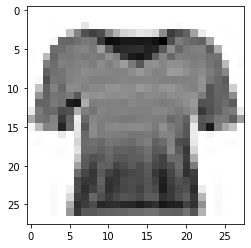

LABEL: 0
35743  index was correctly classified by SVM and misclassified by logistic regression algorithm.


In [23]:
miscl_samples = [i for i in range(len(LR_prediction)) if (LR_prediction[i] != SVM_prediction[i]) and (SVM_prediction[i] == y_test[i]) ]

rand = np.random.choice(miscl_samples)
plot_input(X_test,y_test,rand)

print(rand, " index was correctly classified by SVM and misclassified by logistic regression algorithm.")

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [26]:
# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True, floatmode = 'fixed') 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix( SVM_prediction,y_test)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)

confusion_LR = skm.confusion_matrix( LR_prediction,y_test)
print("\n Confusion matrix LR  \n \n", confusion_LR)

Labels and frequencies in test set:  [5792 5809 5785 5820 5795 5781 5825 5803 5795 5795]

 Confusion matrix SVM  
 
 [[4762   33  110  277   14    7 1056    0   30    3]
 [   6 5557    3   71    8    0    7    0    5    0]
 [ 128   67 4547  107  922    1  873    0   60    2]
 [ 295  127   55 4938  166    2  157    0   24    1]
 [  27    7  615  245 4190    0  539    0   31    1]
 [   8    0    5    0    2 5262    6  245   39  107]
 [ 483   16  416  158  477    0 3080    0   44    1]
 [   0    0    0    0    0  293    0 5187   23  171]
 [  82    2   34   24   15   31  107    9 5530    3]
 [   1    0    0    0    1  185    0  362    9 5506]]

 Confusion matrix LR  
 
 [[4649   26  106  278   38   16  979    0   70   10]
 [  19 5525   11   75   11    1   12    0    3    2]
 [ 152   73 4139  105  888    8  809    0  102    3]
 [ 334  140   54 4870  163    5  174    0   46    3]
 [  41   18  810  230 4036    0  748    0   53    1]
 [  19    0   27    2   11 4984   30  316   64  119]
 [ 482 

In [27]:
### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )


 Confusion matrix SVM (normalized)   
 
 [[0.82 0.01 0.02 0.05 0.00 0.00 0.18 0.00 0.01 0.00]
 [0.00 0.96 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.02 0.01 0.79 0.02 0.16 0.00 0.15 0.00 0.01 0.00]
 [0.05 0.02 0.01 0.85 0.03 0.00 0.03 0.00 0.00 0.00]
 [0.00 0.00 0.11 0.04 0.72 0.00 0.09 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.91 0.00 0.04 0.01 0.02]
 [0.08 0.00 0.07 0.03 0.08 0.00 0.53 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.05 0.00 0.89 0.00 0.03]
 [0.01 0.00 0.01 0.00 0.00 0.01 0.02 0.00 0.95 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.03 0.00 0.06 0.00 0.95]]

 Confusion matrix LR (normalized)   
 
 [[0.80 0.00 0.02 0.05 0.01 0.00 0.17 0.00 0.01 0.00]
 [0.00 0.95 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.03 0.01 0.72 0.02 0.15 0.00 0.14 0.00 0.02 0.00]
 [0.06 0.02 0.01 0.84 0.03 0.00 0.03 0.00 0.01 0.00]
 [0.01 0.00 0.14 0.04 0.70 0.00 0.13 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.86 0.01 0.05 0.01 0.02]
 [0.08 0.00 0.10 0.04 0.11 0.00 0.50 0.00 0.01 0.00]
 [0.00 0.00 0.0


 Confusion matrix SVM (not normalized)


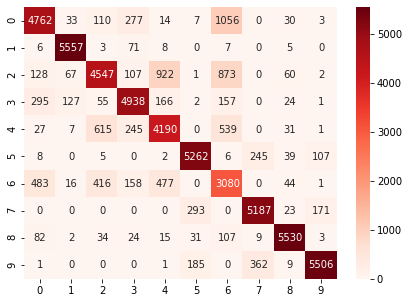


 Confusion matrix LR (not normalized)


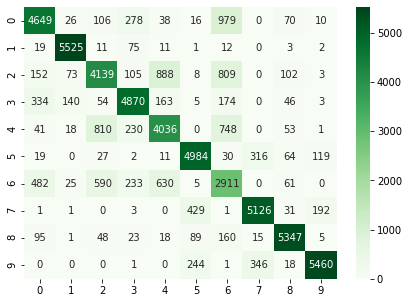

In [21]:
import seaborn as sns

print("\n Confusion matrix SVM (not normalized)")
plt.figure(figsize = (7,5))
sns.heatmap(confusion_SVM, annot=True, fmt="d", cmap="Reds" )
plt.show()

print("\n Confusion matrix LR (not normalized)")
plt.figure(figsize = (7,5))
sns.heatmap(confusion_LR, annot=True, fmt="d", cmap="Greens" )
plt.show()


 Confusion matrix SVM (normalized)


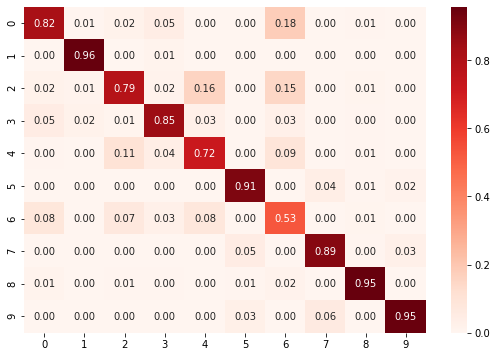


 Confusion matrix LR (normalized)


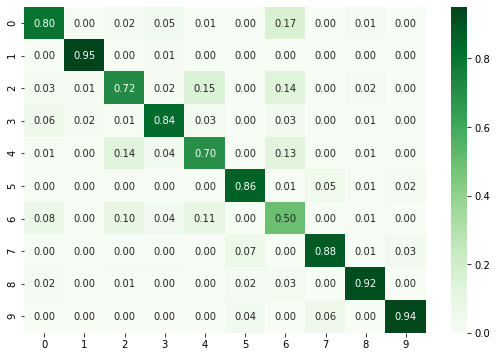

In [22]:
print("\n Confusion matrix SVM (normalized)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_SVM/counts[:,None], annot=True, fmt = "1.2f" , cmap="Reds" )
plt.show()

print("\n Confusion matrix LR (normalized)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_LR /counts[:,None], annot=True, fmt =  "1.2f" , cmap="Greens" )
plt.show()

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.



We see that for example that the 6th entry (related to label '6' - shirt) of my confusion matrices, both for LR and SVM, are the most misclassified, so it means that both my algorithms have a 50% of possibility to misclassify an image in input whose label is 6. There could be also some errors with '0', '2' and '4' labels.

Since the algorithm relies on pixels and images in input are low quality, it is more difficult for him to tell a shirt ('6' label) from a t-shirt (label '0') since they are visually similar to each other and vice versa: indeed they are the biggest misclassified entries of my confusion matrix. Other couples can be pullover/shirt, sandal/sneakers and other clothes that are visually similar to each other.